In [1]:
import hcp_utils as hcp
import nilearn
from nilearn import datasets, plotting, regions
import brainspace
import pandas as pd
import numpy as np
import seaborn as sns
import nibabel as nib
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/home/victoria/NeuroConn')
sys.path.append('/home/victoria/surfdist')
from austin_utils import save_gifti
from NeuroConn.preprocessing.preprocessing import FmriPreppedDataSet
from NeuroConn.gradient.gradient import get_gradients
from brainspace.utils.parcellation import map_to_labels, reduce_by_labels
from brainspace.gradient import GradientMaps
from brainspace.plotting import plot_hemispheres
from surfdist import analysis
from utils import *

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
from neuromaps.datasets import fetch_fslr
import surfplot
from surfplot import Plot
from brainspace.datasets import load_parcellation

surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
lh_parc, rh_parc = load_parcellation('schaefer', 1000)
schaefer_labels_1000 = load_parcellation('schaefer', scale=1000, join=True)

schaefer_region_names = nilearn.datasets.fetch_atlas_schaefer_2018(1000, yeo_networks = 7)
#schaefer_coords = plotting.find_parcellation_cut_coords(schaefer_region_names["maps"])

In [3]:
data_path = '/home/victoria/server/data/COST/COST_mri/derivatives/rest'
dataset = FmriPreppedDataSet(data_path)

i = 0
while i < 50:
    for subject in dataset.subjects.tolist():
        try:
            _,_ = calc_subj_sortest_path(data_path, subject, 33, target_name = "A1", save_to="/home/victoria/Documents/gradients/crtx_paths")
            _,_ = calc_subj_sortest_path(data_path, subject, (43, 45), target_name = "V1", save_to="/home/victoria/Documents/gradients/crtx_paths")
            i += 1
            if i >= 50:
                break
        except:
            pass
    if i >= 50:
        break

In [5]:
data_path = '/home/victoria/server/data/COST/COST_mri/derivatives/rest'
dataset = FmriPreppedDataSet(data_path)


In [6]:
subject = '79623'
calc_subj_sortest_path(data_path, subject, 33, target_name = "A1", save_to="/home/victoria/Documents/gradients/crtx_paths")

NameError: name 'anaysis' is not defined

In [ ]:
data_path = '/home/victoria/server/data/COST/COST_mri/derivatives/rest'
subject = '98754'
path_surf_L = os.path.join(data_path, 'derivatives', f'sub-{subject}', 'anat', f'sub-{subject}_hemi-L_midthickness.32k_fs_LR.surf.gii')
path_surf_R = os.path.join(data_path, 'derivatives', f'sub-{subject}', 'anat', f'sub-{subject}_hemi-R_midthickness.32k_fs_LR.surf.gii')

plot = Plot(path_surf_L, path_surf_R, size=(800, 600), zoom = 1.7)
# grad1_plot.add_layer({'left': grad1[:32492], 'right': grad1[32492:]}, cbar=False, cmap="viridis_r")

fig = plot.build()
fig.savefig('/home/victoria/Documents/gradients/crtx_paths/98754.png', dpi=300)

: 

: 

In [40]:
from surfdist import viz, load, utils, analysis

dist_Tpeak_a1_L = analysis.calc_roi_dist(surfL, cortex_L, TpeakTempL, V1L, dist_type='min')
dist_Tpeak_a1_L

80.08159326324187

In [ ]:
surfplot.surf.plot_surf(surfs, layout = (2, 2))

In [35]:
V1dist = analysis.dist_calc(surfL, cortex_L, V1L)

In [7]:
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

In [38]:
distance_task_temporal_ind = prepare_distance_task_data("SIFI_full.csv", "distances.csv", True)

In [40]:
distance_task_temporal_ind.to_csv("distances_Tpeak_temporal_ind.csv")

In [32]:
distance_task_parietal_ind

participant_id  FlashType  NrBeeps       Dist Type   Distance  \
0                13000          1        1  Dist to A1, LH  46.357340   
1                13000          1        2  Dist to A1, LH  46.357340   
2                13000          2        1  Dist to A1, LH  46.357340   
3                13000          2        2  Dist to A1, LH  46.357340   
4                13000          3        1  Dist to A1, LH  46.357340   
...                ...        ...      ...             ...        ...   
198139           98754          2        2    dist_ratio_R   1.301385   
198140           98754          3        1    dist_ratio_R   1.301385   
198141           98754          3        2    dist_ratio_R   1.301385   
198142           98754          4        1    dist_ratio_R   1.301385   
198143           98754          4        2    dist_ratio_R   1.301385   

       Performance Var   Measure Demographic Var  Dem Value  
0              correct  0.655172             sex        1.0  
1              correct  0.148148             sex        1.0  
2              correct  0.766667             sex        1.0  
3              correct  0.035714             sex        1.0  
4              correct  0.178571             sex        1.0  
...                ...       ...             ...        ...  
198139      bl_correct  0.896552             age       25.3  
198140      bl_correct  0.133333             age       25.3  
198141      bl_correct  0.133333             age       25.3  
198142      bl_correct  0.600000             age       25.3  
198143      bl_correct  0.600000             age       25.3  

[198144 rows x 9 columns]

/home/victoria/.conda/envs/neuro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


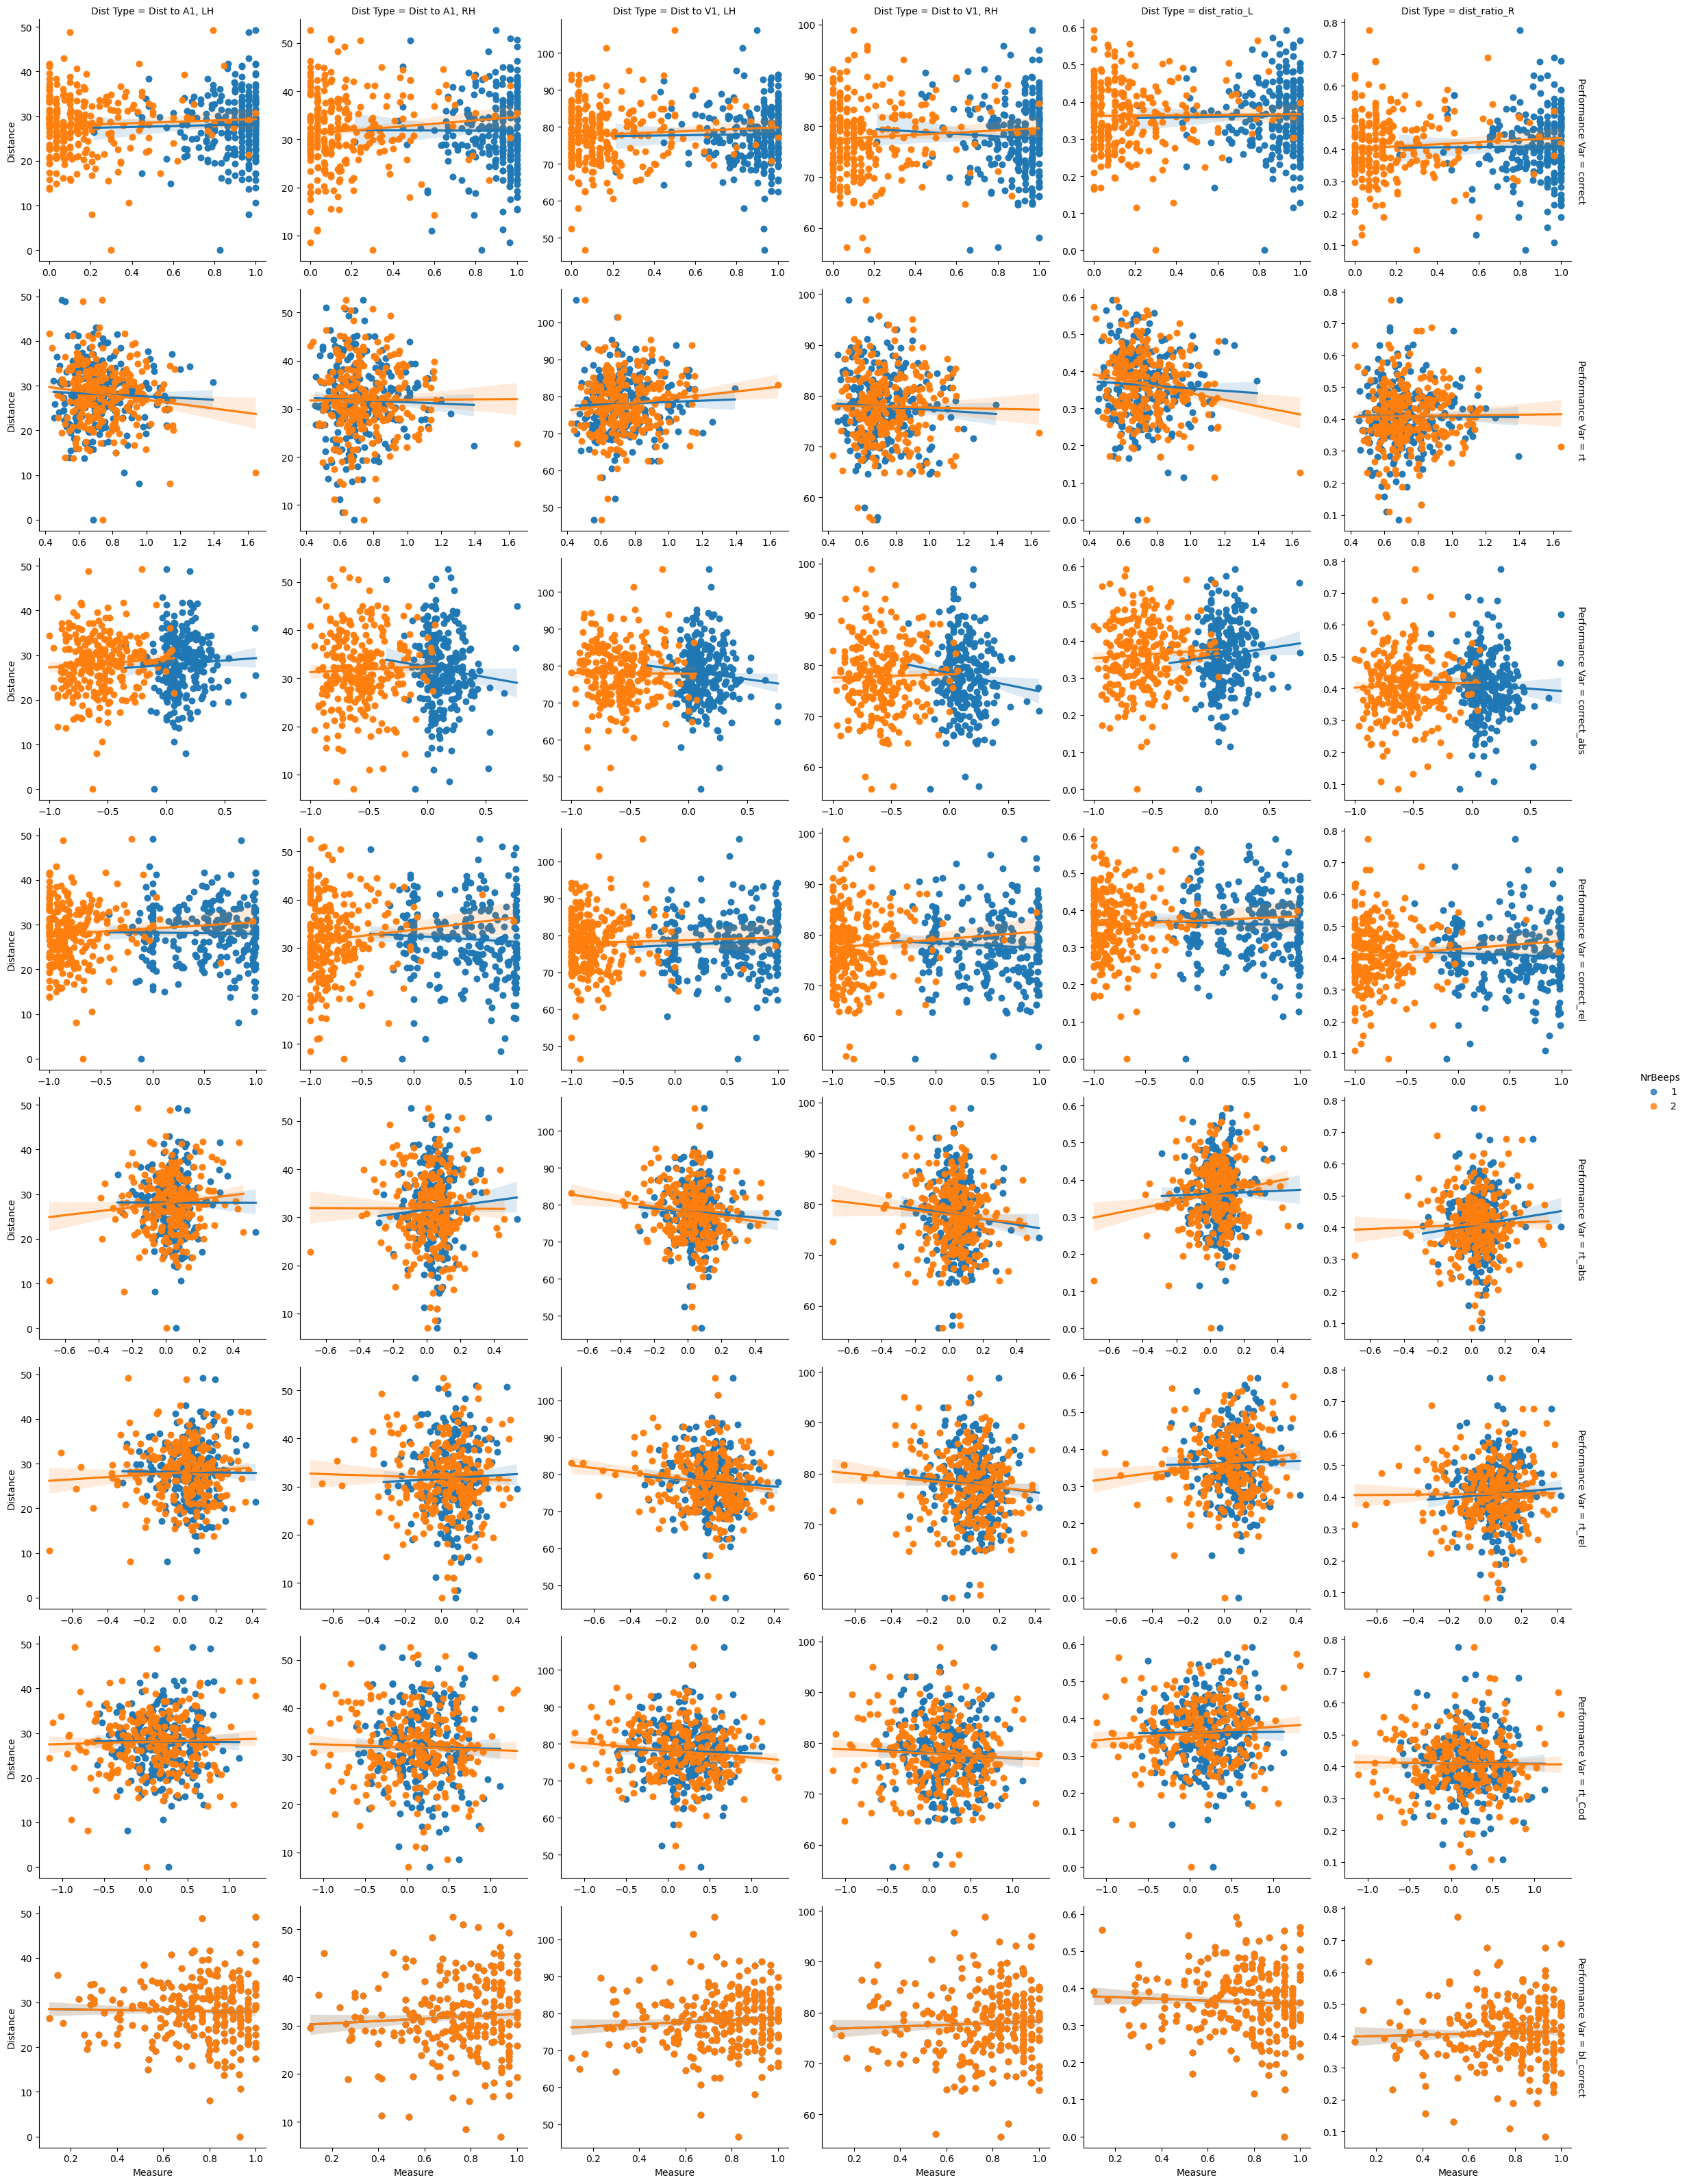

In [41]:
from scipy.stats import pearsonr
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'

def annotate_corr(x, y, **kwargs):
    r, pval = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}\np = {pval:.2f}", xy=(.1, .9), xycoords=ax.transAxes)

g = sns.FacetGrid(distance_task_temporal_ind[distance_task_temporal_ind["FlashType"] == 2], col="Dist Type", row = 'Performance Var', hue="NrBeeps", height=4, aspect=1, margin_titles=True, sharex = False, sharey = False)
g.map(sns.regplot, "Measure", "Distance")#.add_legend().map(annotate_corr, "Measure", "Distance")
g.add_legend()
plt.savefig("Flash2_scatter_ind_temp_peak.svg", dpi = 300, format = 'svg')

/home/victoria/.conda/envs/neuro/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


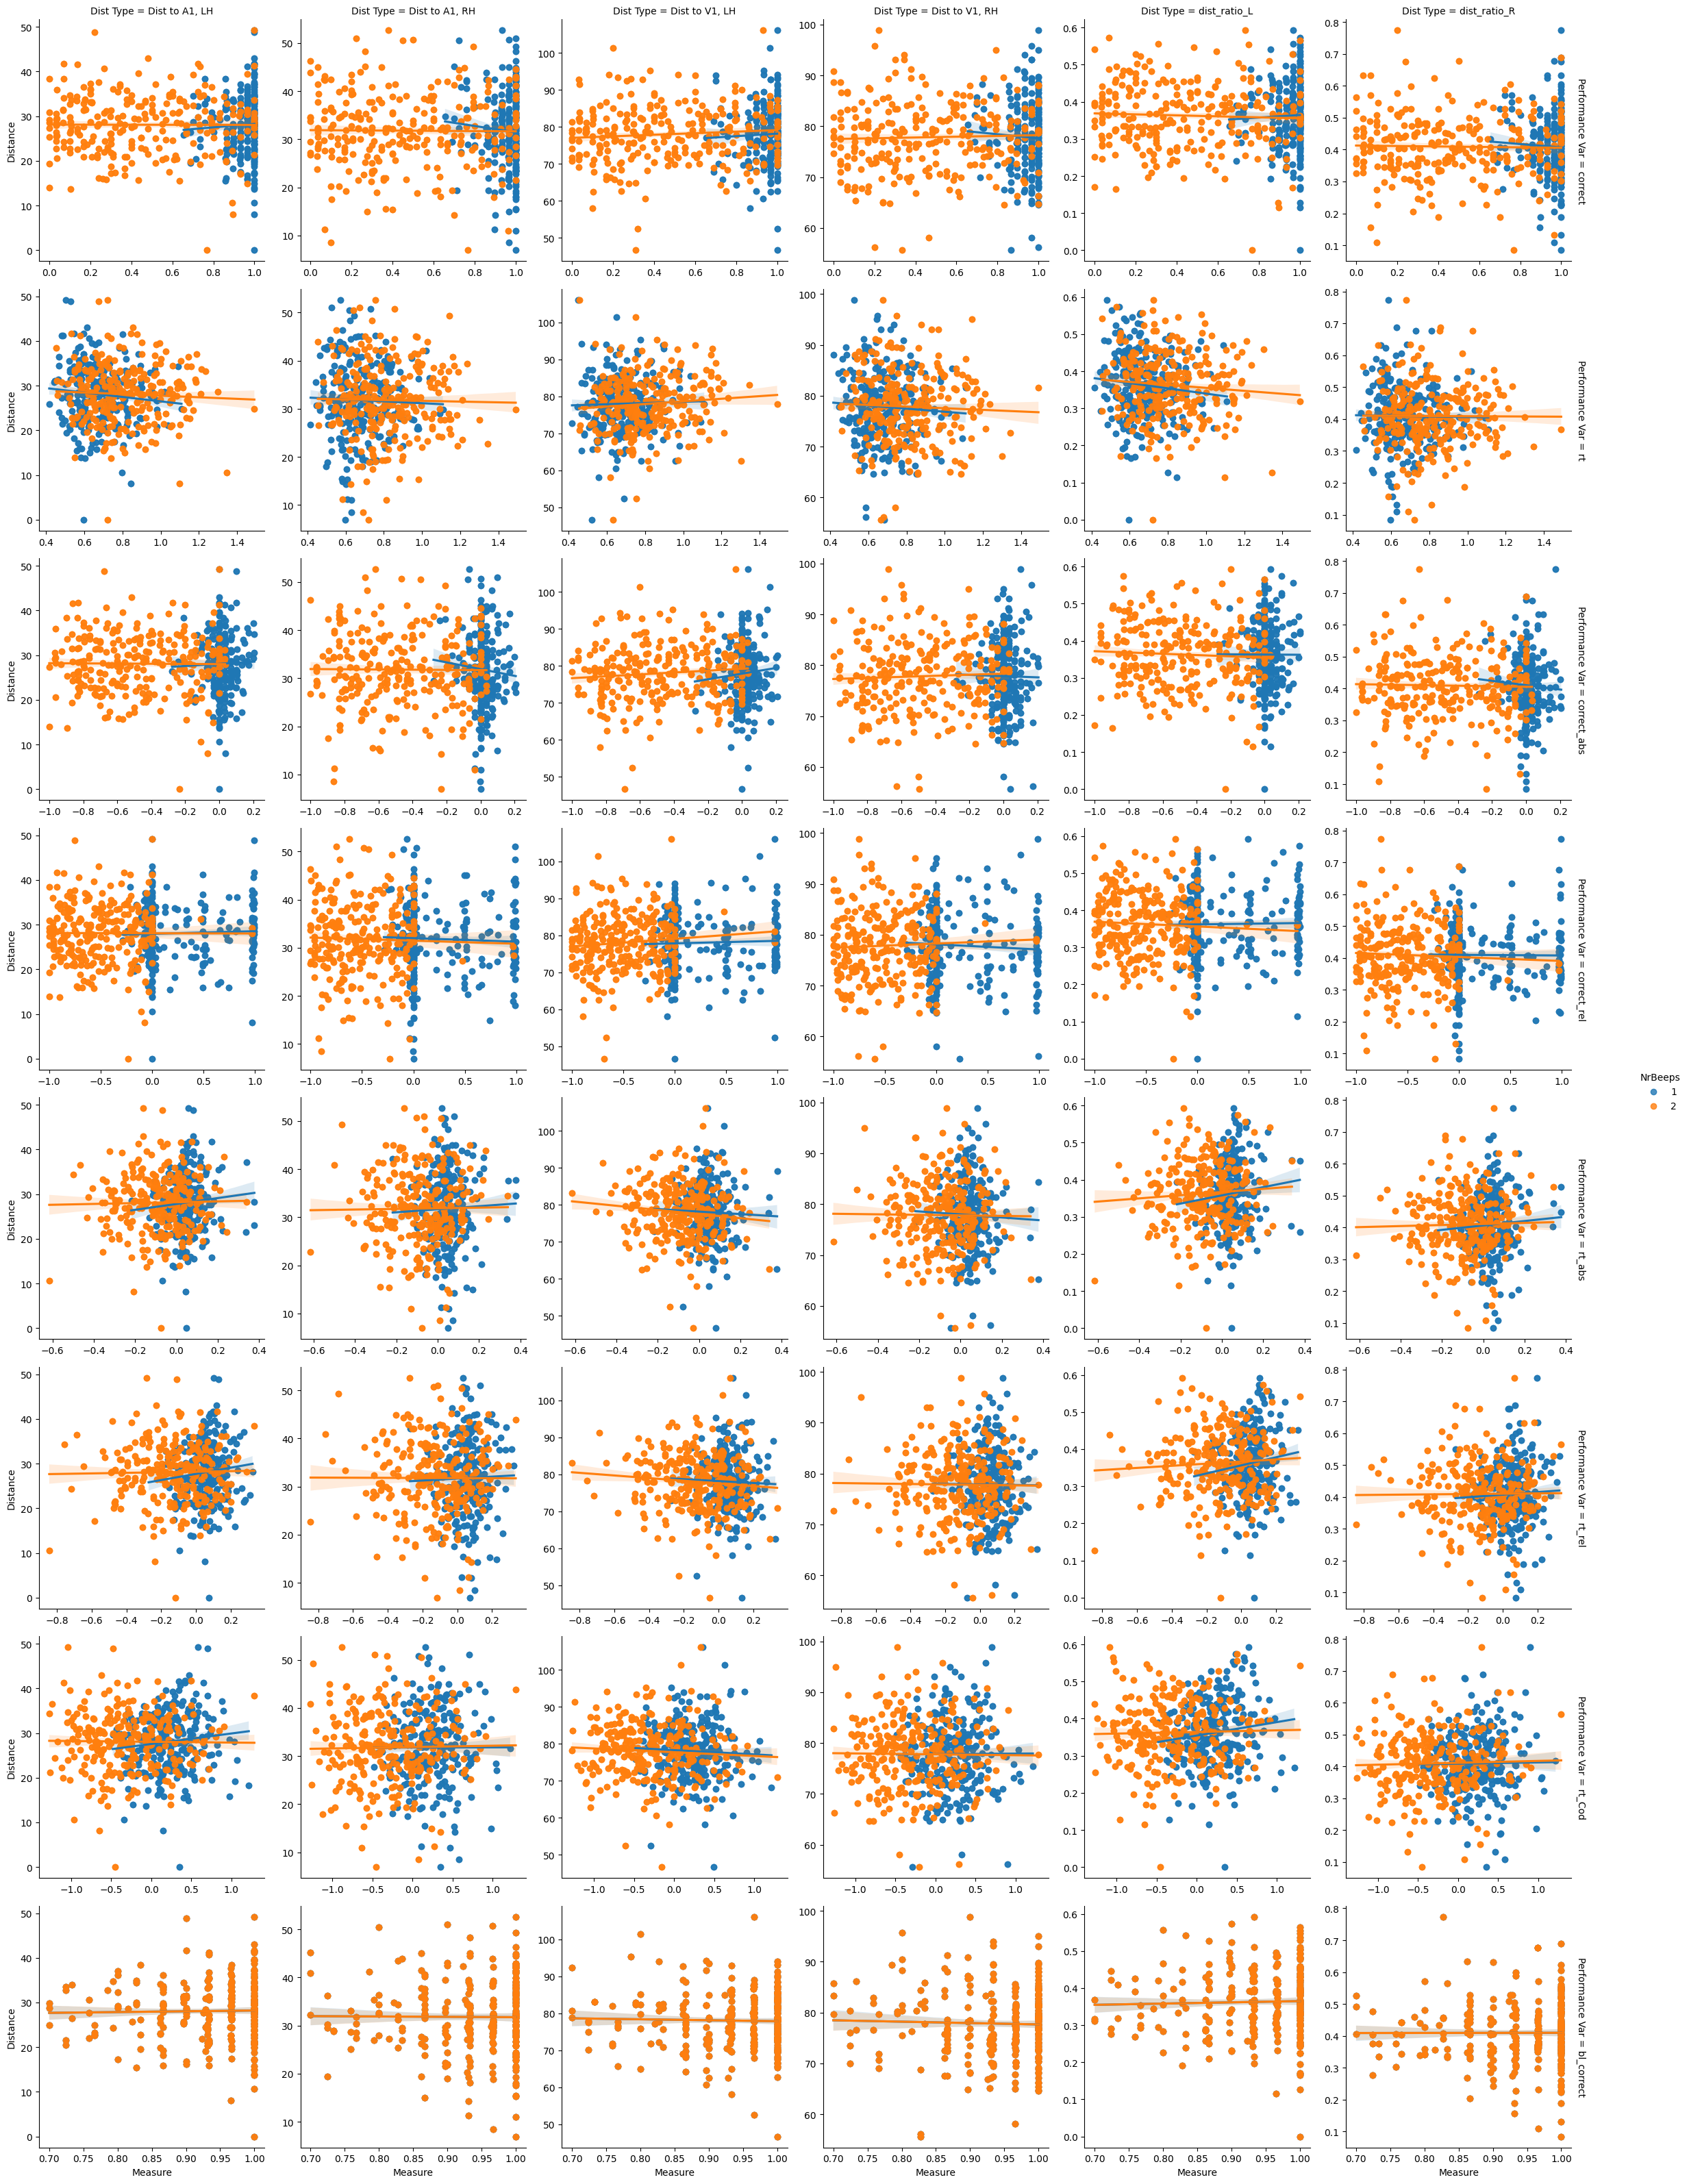

In [42]:
g = sns.FacetGrid(distance_task_temporal_ind[distance_task_temporal_ind["FlashType"] == 1], col="Dist Type", row = 'Performance Var', hue="NrBeeps", height=4, aspect=1, margin_titles=True, sharex = False, sharey = False)
g.map(sns.regplot, "Measure", "Distance")#.add_legend().map(annotate_corr, "Measure", "Distance")
g.add_legend()
plt.savefig("Flash1_scatter_ind_temp_peak.svg", dpi = 300, format = 'svg')